In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Power_curve = pd.read_csv('data/train/Power_curve.csv').set_index('Wind speed (m/s)')

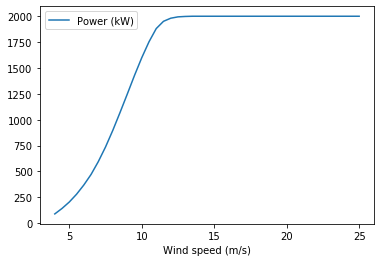

In [3]:
Power_curve.plot()
plt.show()

In [4]:
wf1_failures_train = pd.read_csv('data/train/wind-farm-1-failures-training.csv', sep=';', parse_dates=['Timestamp'])
wf1_logs_train = pd.read_csv('data/train/wind-farm-1-logs-training.csv', sep=';')
wf1_metmast_train = pd.read_csv('data/train/wind-farm-1-metmast-training.csv', sep=';', parse_dates=['Timestamp'], index_col='Timestamp')
wf1_signals_train = pd.read_csv('data/train/wind-farm-1-signals-training.csv', sep=';', parse_dates=['Timestamp'])

In [5]:
wf1_signals_train.head(5)

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T11,2016-01-01 00:00:00+00:00,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9
1,T06,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,-307.1,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6
2,T01,2016-01-01 00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
3,T09,2016-01-01 00:00:00+00:00,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
4,T07,2016-01-01 00:00:00+00:00,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3


In [6]:
# nazwy turbin:
wf1_signals_train.Turbine_ID.drop_duplicates()

0    T11
1    T06
2    T01
3    T09
4    T07
Name: Turbine_ID, dtype: object

In [7]:
# Podział na zbiory dla każdej z turbin osobno, index czasowy
T01_signals_train = wf1_signals_train[wf1_signals_train.Turbine_ID=='T01'].set_index('Timestamp')
T06_signals_train = wf1_signals_train[wf1_signals_train.Turbine_ID=='T06'].set_index('Timestamp')
T07_signals_train = wf1_signals_train[wf1_signals_train.Turbine_ID=='T07'].set_index('Timestamp')
T09_signals_train = wf1_signals_train[wf1_signals_train.Turbine_ID=='T09'].set_index('Timestamp')
T11_signals_train = wf1_signals_train[wf1_signals_train.Turbine_ID=='T11'].set_index('Timestamp')

In [8]:
# Duplikaty timestampów?
T01_signals_train[T01_signals_train.index.duplicated(keep=False)]

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-30 02:00:00+00:00,T01,1717.7,1410.7,1648.7,44.2,69.0,118,114,112,48,...,-902.0,-583.3,-1000.0,163.2,786.2,1000.0,406.1,240.0,58,115.5
2016-10-30 02:00:00+00:00,T01,1734.5,1637.7,1680.8,15.1,70.0,133,126,124,49,...,-585.3,-583.3,-973.8,21.0,407.2,611.1,406.1,11.0,58,109.1
2016-10-30 02:10:00+00:00,T01,1689.1,1449.9,1618.6,47.6,67.0,113,110,109,47,...,-995.9,-616.5,-1000.0,29.5,955.7,1000.0,423.5,105.4,57,115.5
2016-10-30 02:10:00+00:00,T01,1748.9,1632.5,1681.5,17.6,70.0,134,126,124,49,...,-585.6,-583.3,-935.1,20.7,407.3,590.8,406.1,10.9,58,109.1
2016-10-30 02:20:00+00:00,T01,1708.9,1496.0,1633.0,38.8,66.0,109,106,105,46,...,-951.5,-583.3,-1000.0,127.8,901.6,1000.0,406.1,198.1,56,115.5
2016-10-30 02:20:00+00:00,T01,1748.0,1626.2,1681.4,18.4,70.0,134,127,124,50,...,-591.7,-583.3,-1000.0,44.2,410.7,714.8,406.1,24.9,58,108.8
2016-10-30 02:30:00+00:00,T01,1731.4,1603.5,1663.0,18.8,65.0,113,108,106,45,...,-895.7,-583.3,-1000.0,152.9,716.4,1000.0,406.1,218.3,55,115.5
2016-10-30 02:30:00+00:00,T01,1746.0,1631.1,1676.9,16.4,71.0,133,126,124,50,...,-733.6,-583.3,-1000.0,192.0,561.7,1000.0,406.1,218.9,58,108.8
2016-10-30 02:40:00+00:00,T01,1735.2,1607.3,1662.0,18.5,64.0,115,109,108,45,...,-915.9,-583.3,-1000.0,147.2,735.4,1000.0,406.1,204.7,55,115.5


In [9]:
# bez duplikatów, uzupełnione czasy (interpolacja liniowa, co 10 minut)
T01_signals_train2 = T01_signals_train[~T01_signals_train.index.duplicated()].resample('10T').interpolate()
T06_signals_train2 = T06_signals_train[~T06_signals_train.index.duplicated()].resample('10T').interpolate()
T07_signals_train2 = T07_signals_train[~T07_signals_train.index.duplicated()].resample('10T').interpolate()
T09_signals_train2 = T09_signals_train[~T09_signals_train.index.duplicated()].resample('10T').interpolate()
T11_signals_train2 = T11_signals_train[~T11_signals_train.index.duplicated()].resample('10T').interpolate()

In [10]:
# Original == 0 - dane interpolowane
# Original == 1 - dane oryginalne 

T01_signals_train2['Original']=0
T01_signals_train2.loc[T01_signals_train.index,'Original']=1
T06_signals_train2['Original']=0
T06_signals_train2.loc[T06_signals_train.index,'Original']=1
T07_signals_train2['Original']=0
T07_signals_train2.loc[T07_signals_train.index,'Original']=1
T09_signals_train2['Original']=0
T09_signals_train2.loc[T09_signals_train.index,'Original']=1
T11_signals_train2['Original']=0
T11_signals_train2.loc[T11_signals_train.index,'Original']=1

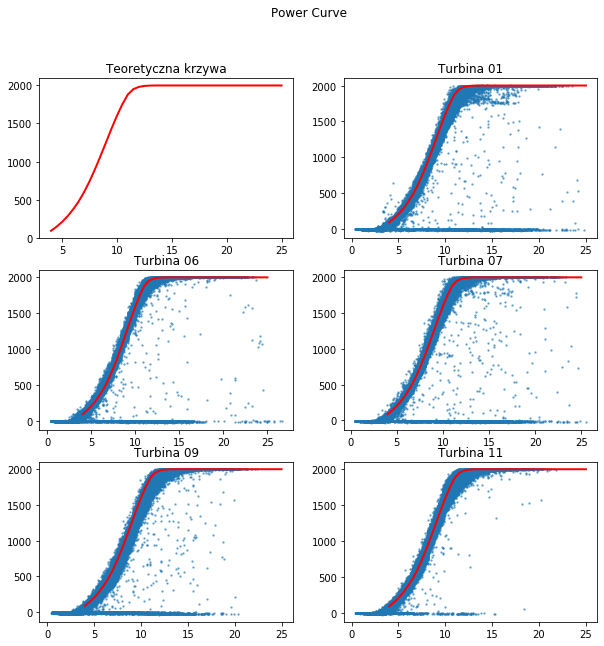

In [11]:
fig, ax = plt.subplots(3,2, figsize=(10,10))
fig.suptitle('Power Curve')
ax[0,0].plot(Power_curve, c='r', linewidth=2)
ax[0,0].set_title('Teoretyczna krzywa')

ax[0,1].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T01_signals_train, s=2, alpha=0.5)
ax[0,1].plot(Power_curve, c='r', linewidth=2)
ax[0,1].set_title('Turbina 01')

ax[1,0].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T06_signals_train, s=2, alpha=0.5)
ax[1,0].plot(Power_curve, c='r', linewidth=2)
ax[1,0].set_title('Turbina 06')

ax[1,1].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T07_signals_train, s=2, alpha=0.5)
ax[1,1].plot(Power_curve, c='r', linewidth=2)
ax[1,1].set_title('Turbina 07')

ax[2,0].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T09_signals_train, s=2, alpha=0.5)
ax[2,0].plot(Power_curve, c='r', linewidth=2)
ax[2,0].set_title('Turbina 09')

ax[2,1].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T11_signals_train, s=2, alpha=0.5)
ax[2,1].plot(Power_curve, c='r', linewidth=2)
ax[2,1].set_title('Turbina 11')

plt.show()

In [12]:
# Rozdzielenie failures na poszczególne turbiny:
T01_failures_train = wf1_failures_train[wf1_failures_train.Turbine_ID=='T01'].set_index('Timestamp')
T06_failures_train = wf1_failures_train[wf1_failures_train.Turbine_ID=='T06'].set_index('Timestamp')
T07_failures_train = wf1_failures_train[wf1_failures_train.Turbine_ID=='T07'].set_index('Timestamp')
T09_failures_train = wf1_failures_train[wf1_failures_train.Turbine_ID=='T09'].set_index('Timestamp')
T11_failures_train = wf1_failures_train[wf1_failures_train.Turbine_ID=='T11'].set_index('Timestamp')

In [13]:
T01_failures_train.index.date

array([datetime.date(2016, 7, 18), datetime.date(2017, 8, 11)],
      dtype=object)

In [14]:
# Failure == 1 - danego DNIA była zgłoszona awaria
# Failure == 0 - danego DNIA nie było zgłoszonej awarii
T01_signals_train2['Failure']=np.isin(T01_signals_train2.index.date, T01_failures_train.index.date).astype(int)
T06_signals_train2['Failure']=np.isin(T06_signals_train2.index.date, T06_failures_train.index.date).astype(int)
T07_signals_train2['Failure']=np.isin(T07_signals_train2.index.date, T07_failures_train.index.date).astype(int)
T09_signals_train2['Failure']=np.isin(T09_signals_train2.index.date, T09_failures_train.index.date).astype(int)
T11_signals_train2['Failure']=np.isin(T11_signals_train2.index.date, T11_failures_train.index.date).astype(int)

<IPython.core.display.Javascript object>


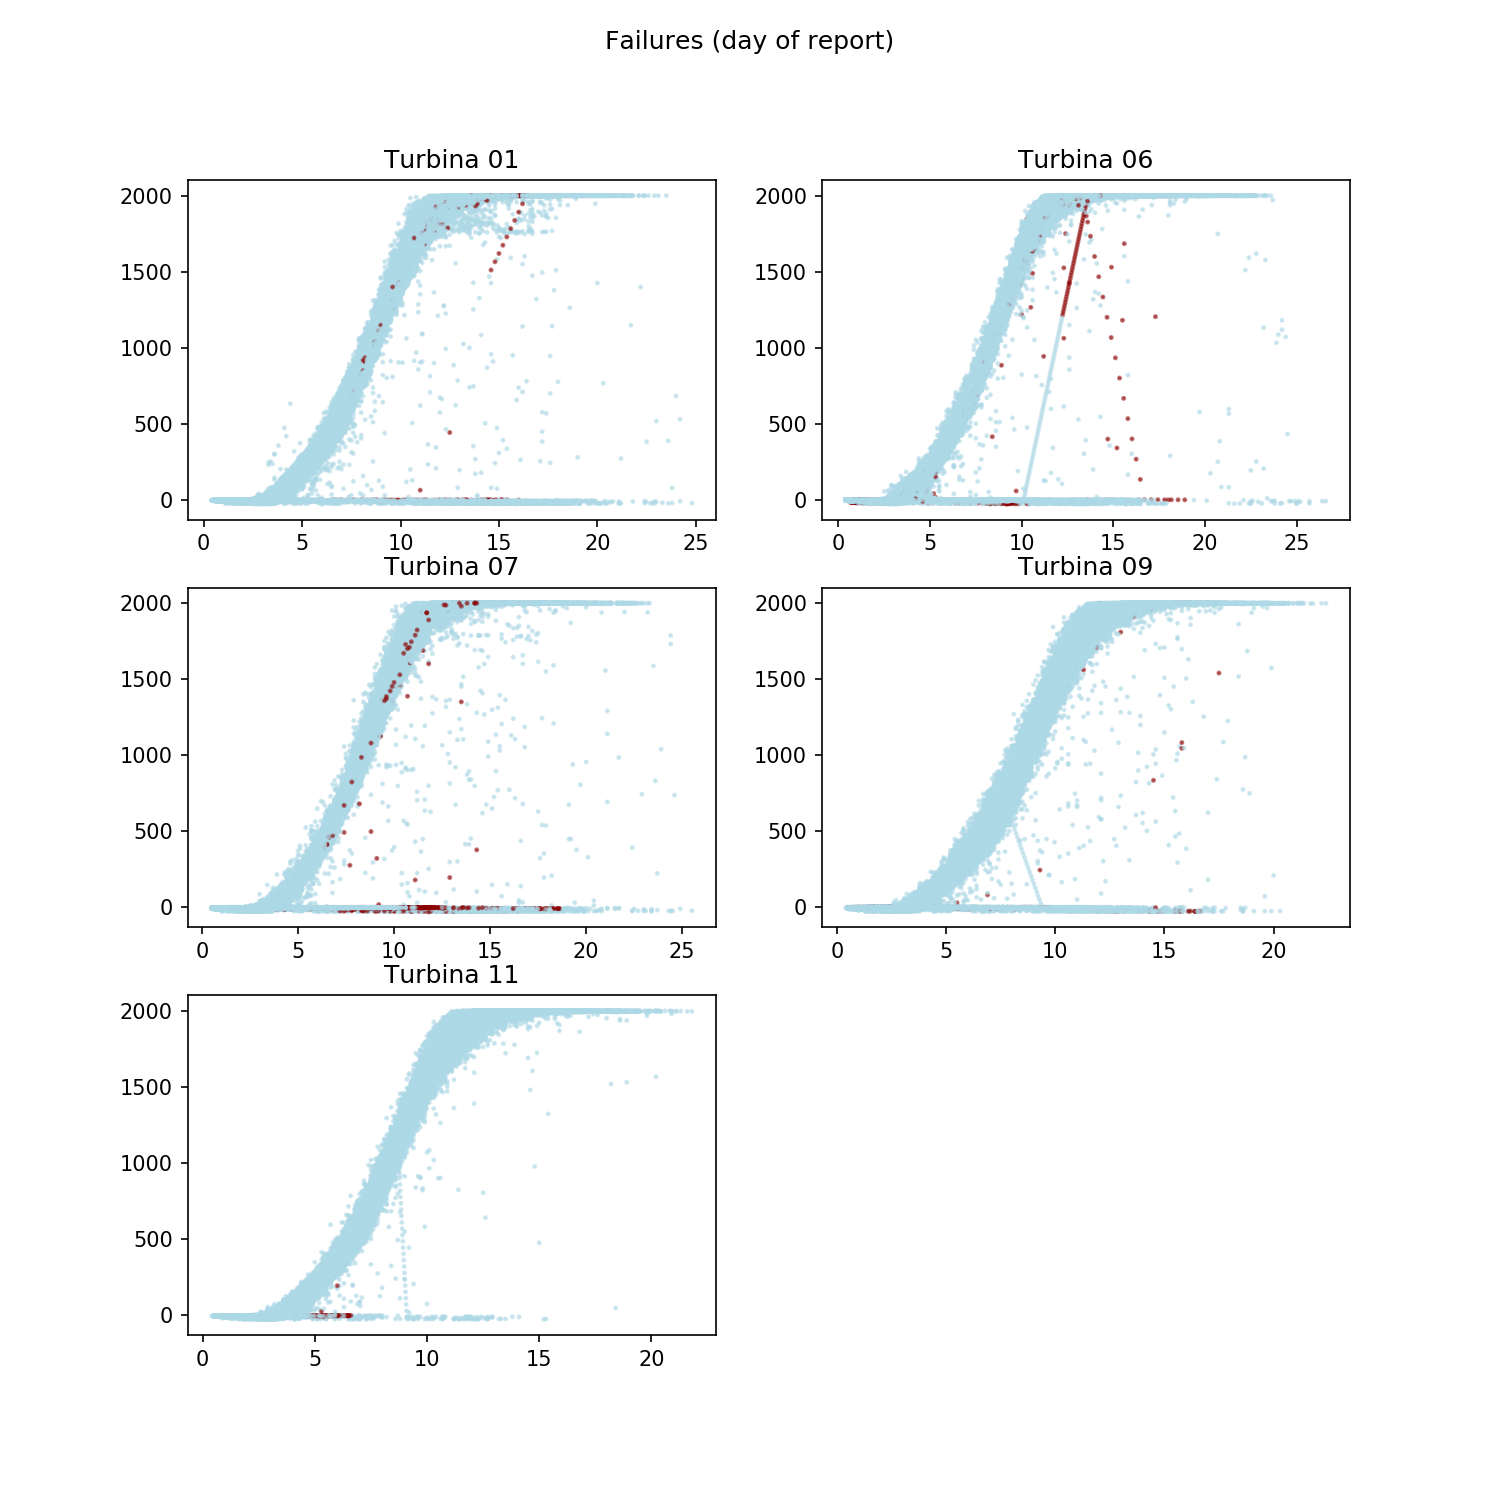

In [25]:
%matplotlib notebook
fig, ax = plt.subplots(3, 2, figsize=(10,10))
fig.suptitle('Failures (day of report)')

colors={0:'lightblue', 1:'darkred'}

ax[0,0].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T01_signals_train2, 
                s=2, c=T01_signals_train2['Failure'].map(colors), alpha=0.5)
#ax.plot(Power_curve, c='r', linewidth=2)
ax[0,0].set_title('Turbina 01')

ax[0,1].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T06_signals_train2, 
                s=2, c=T06_signals_train2['Failure'].map(colors), alpha=0.5)
#ax.plot(Power_curve, c='r', linewidth=2)
ax[0,1].set_title('Turbina 06')

ax[1,0].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T07_signals_train2, 
                s=2, c=T07_signals_train2['Failure'].map(colors), alpha=0.5)
#ax.plot(Power_curve, c='r', linewidth=2)
ax[1,0].set_title('Turbina 07')

ax[1,1].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T09_signals_train2, 
                s=2, c=T09_signals_train2['Failure'].map(colors), alpha=0.5)
#ax.plot(Power_curve, c='r', linewidth=2)
ax[1,1].set_title('Turbina 09')

ax[2,0].scatter('Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', data=T11_signals_train2, 
                s=2, c=T11_signals_train2['Failure'].map(colors), alpha=0.5)
#ax.plot(Power_curve, c='r', linewidth=2)
ax[2,0].set_title('Turbina 11')

ax[2,1].set_axis_off()

plt.
plt.show()

## Najważniejsze zmienne:
 * Turbine_ID. 
 * Timestamp.
 * Grd_Prod_Pwr_Avg. *(generowany prąd, pierwsza najważniejsza zmienna)*
 * Amb_WindSpeed_Avg. *(prędkość wiatru, druga najważniejsza zmienna)*
 * Amb_Temp_Avg.  *(średnia temperatura zewnętrzna)*
 * Nac_Temp_Avg.  *(średnia temperatura w komorze turbiny)*
 * Rtr_RPM_Avg.  *(średnie obroty na minutę śmigła)*
 * Gear_Bear_Temp_Avg.  *(Average temperature in gearbox bearing on high speed shaft)*
 * Gen_RPM_Avg.  *(Average generator rpm)*
 * Gen_Bear2_Temp_Avg.  *(Average temperature in generator bearing 2 (Drive End))*
 * Gen_Bear_Temp_Avg.  *(Average temperature in generator bearing 1 (Non-Drive End))*
 * Day
 * Month
 * Year
 * Failure. 1 –awaria, 0 wpp.

In [16]:
def pair_plot(ax, turbine_nr, xcol, ycol, maping = 'Original'):
    if turbine_nr == 1:
        df = T01_signals_train2
    if turbine_nr == 6:
        df = T06_signals_train2
    if turbine_nr == 7:
        df = T07_signals_train2
    if turbine_nr == 9:
        df = T09_signals_train2
    if turbine_nr == 11:
        df = T11_signals_train2
    if maping == 'Original':
        colmap = {1:'blue', 0:'lightblue'}
    elif maping == "Failure":
        colmap = {0:'lightblue', 1:'darkred'}
    ax.scatter(xcol, ycol, data = df, c=df[maping].map(colmap), s=2)
    ax.set_title("Turbina " + str(turbine_nr))
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)

In [17]:
def multi_pair_plot(xcol, ycol, maping='Original'):
    fig, ax = plt.subplots(3,2, figsize=(10,10))
    pair_plot(ax[0,0], 1, xcol, ycol, maping)
    pair_plot(ax[0,1], 6, xcol, ycol, maping)
    pair_plot(ax[1,0], 7, xcol, ycol, maping)
    pair_plot(ax[1,1], 9, xcol, ycol, maping)
    pair_plot(ax[2,0], 11, xcol, ycol, maping)
    ax[2,1].set_axis_off()
    plt.tight_layout()
    plt.show()

## Temperatura wewnątrz / Temperatura otoczenia

<IPython.core.display.Javascript object>


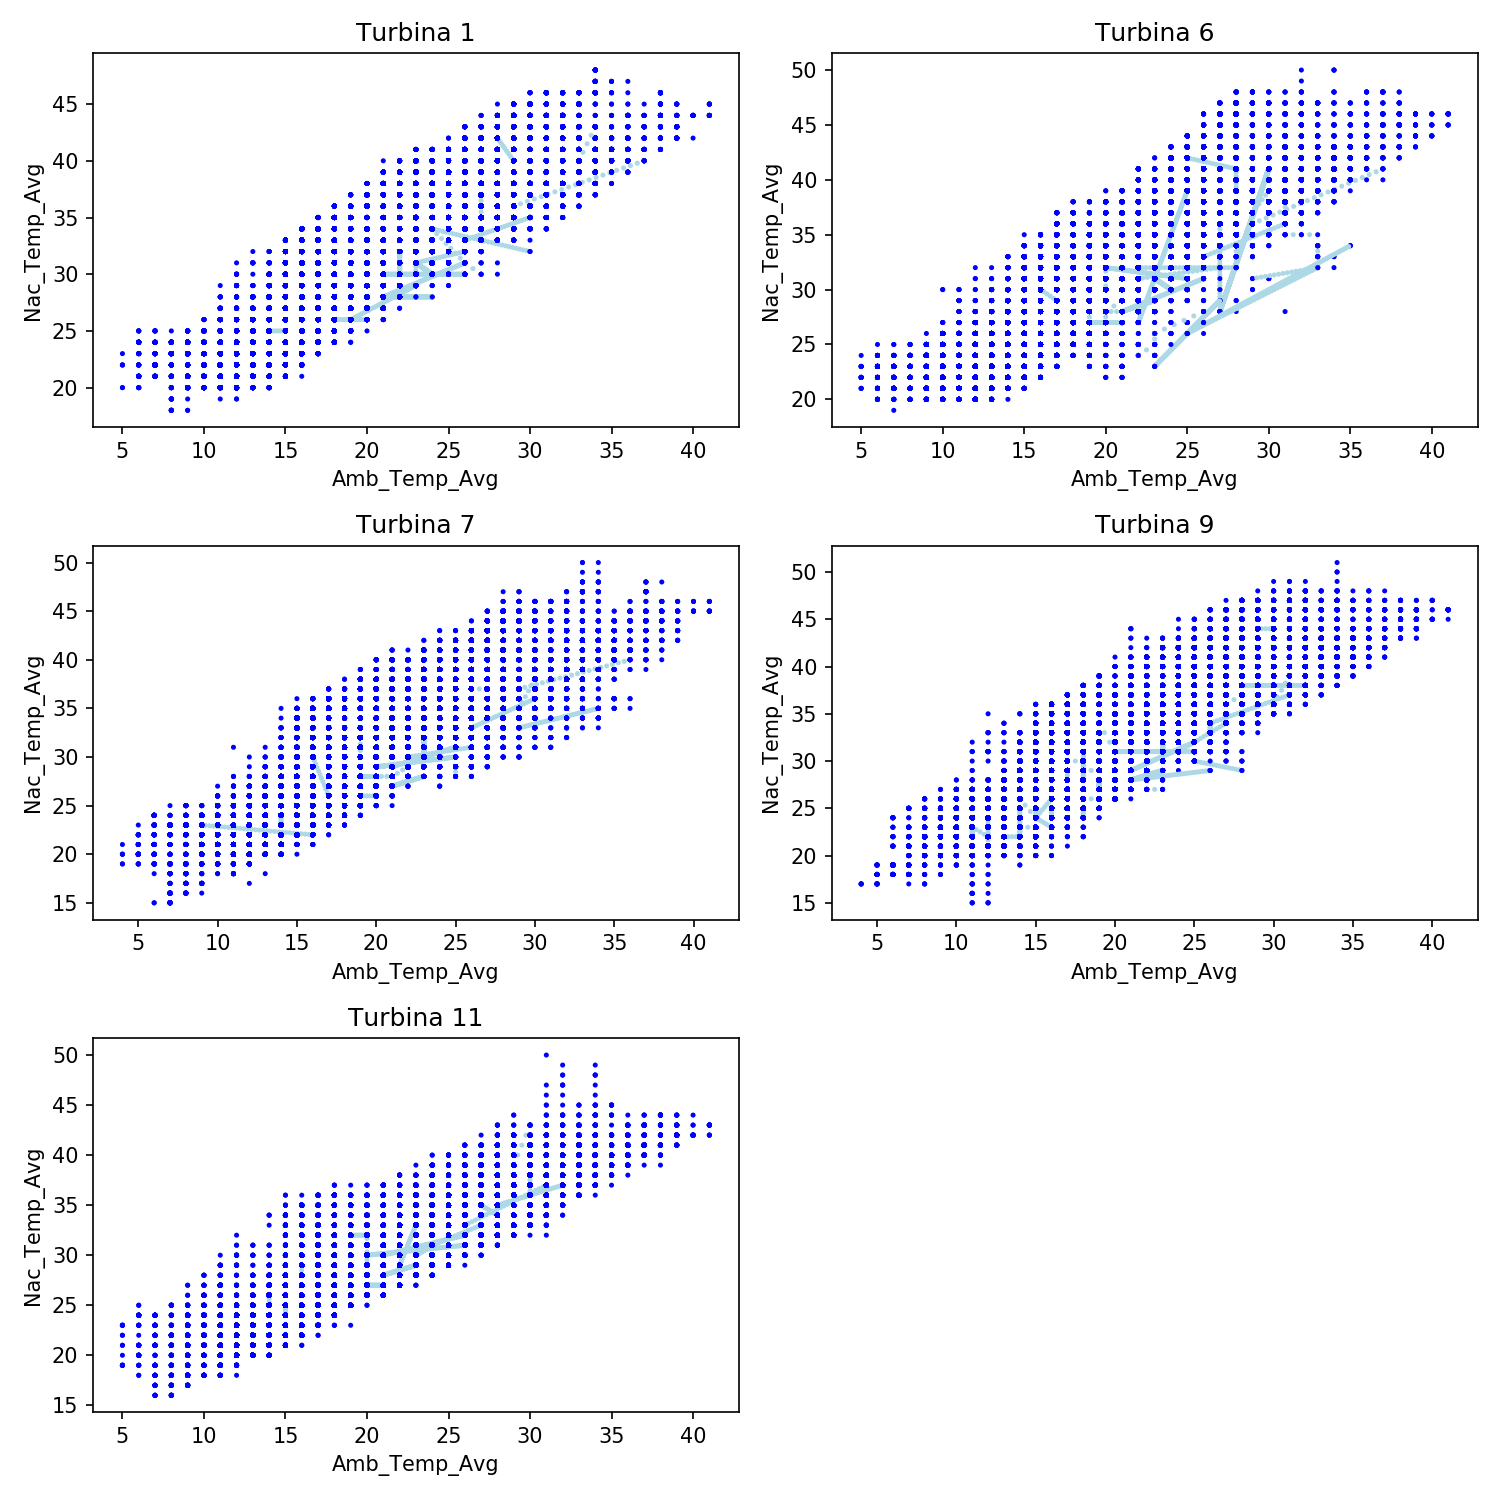

In [18]:
multi_pair_plot("Amb_Temp_Avg", "Nac_Temp_Avg")

## Temp. łożysk generatora DE / NDE

<IPython.core.display.Javascript object>


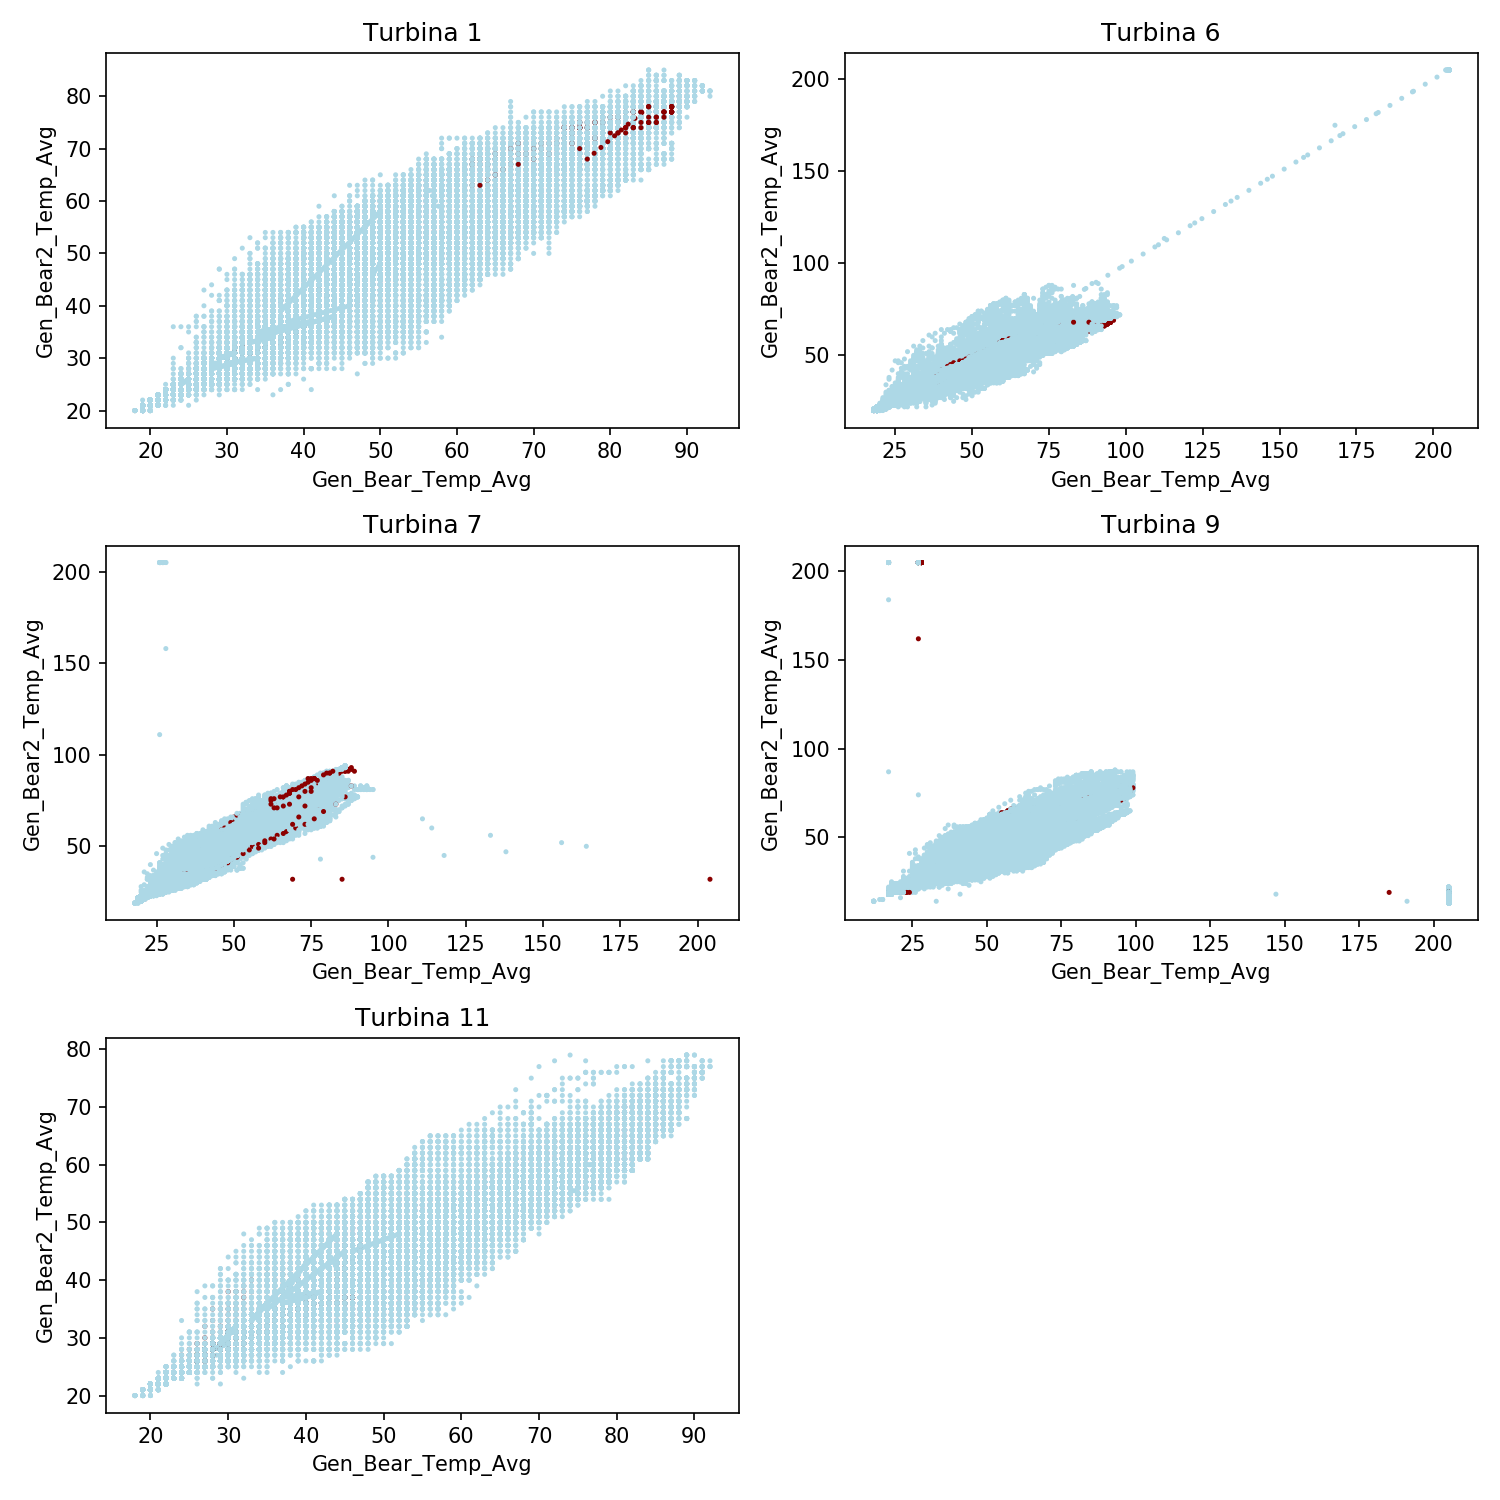

In [19]:
multi_pair_plot("Gen_Bear_Temp_Avg", "Gen_Bear2_Temp_Avg", "Failure")

## Obroty śmigła / Prędkość wiatru

<IPython.core.display.Javascript object>


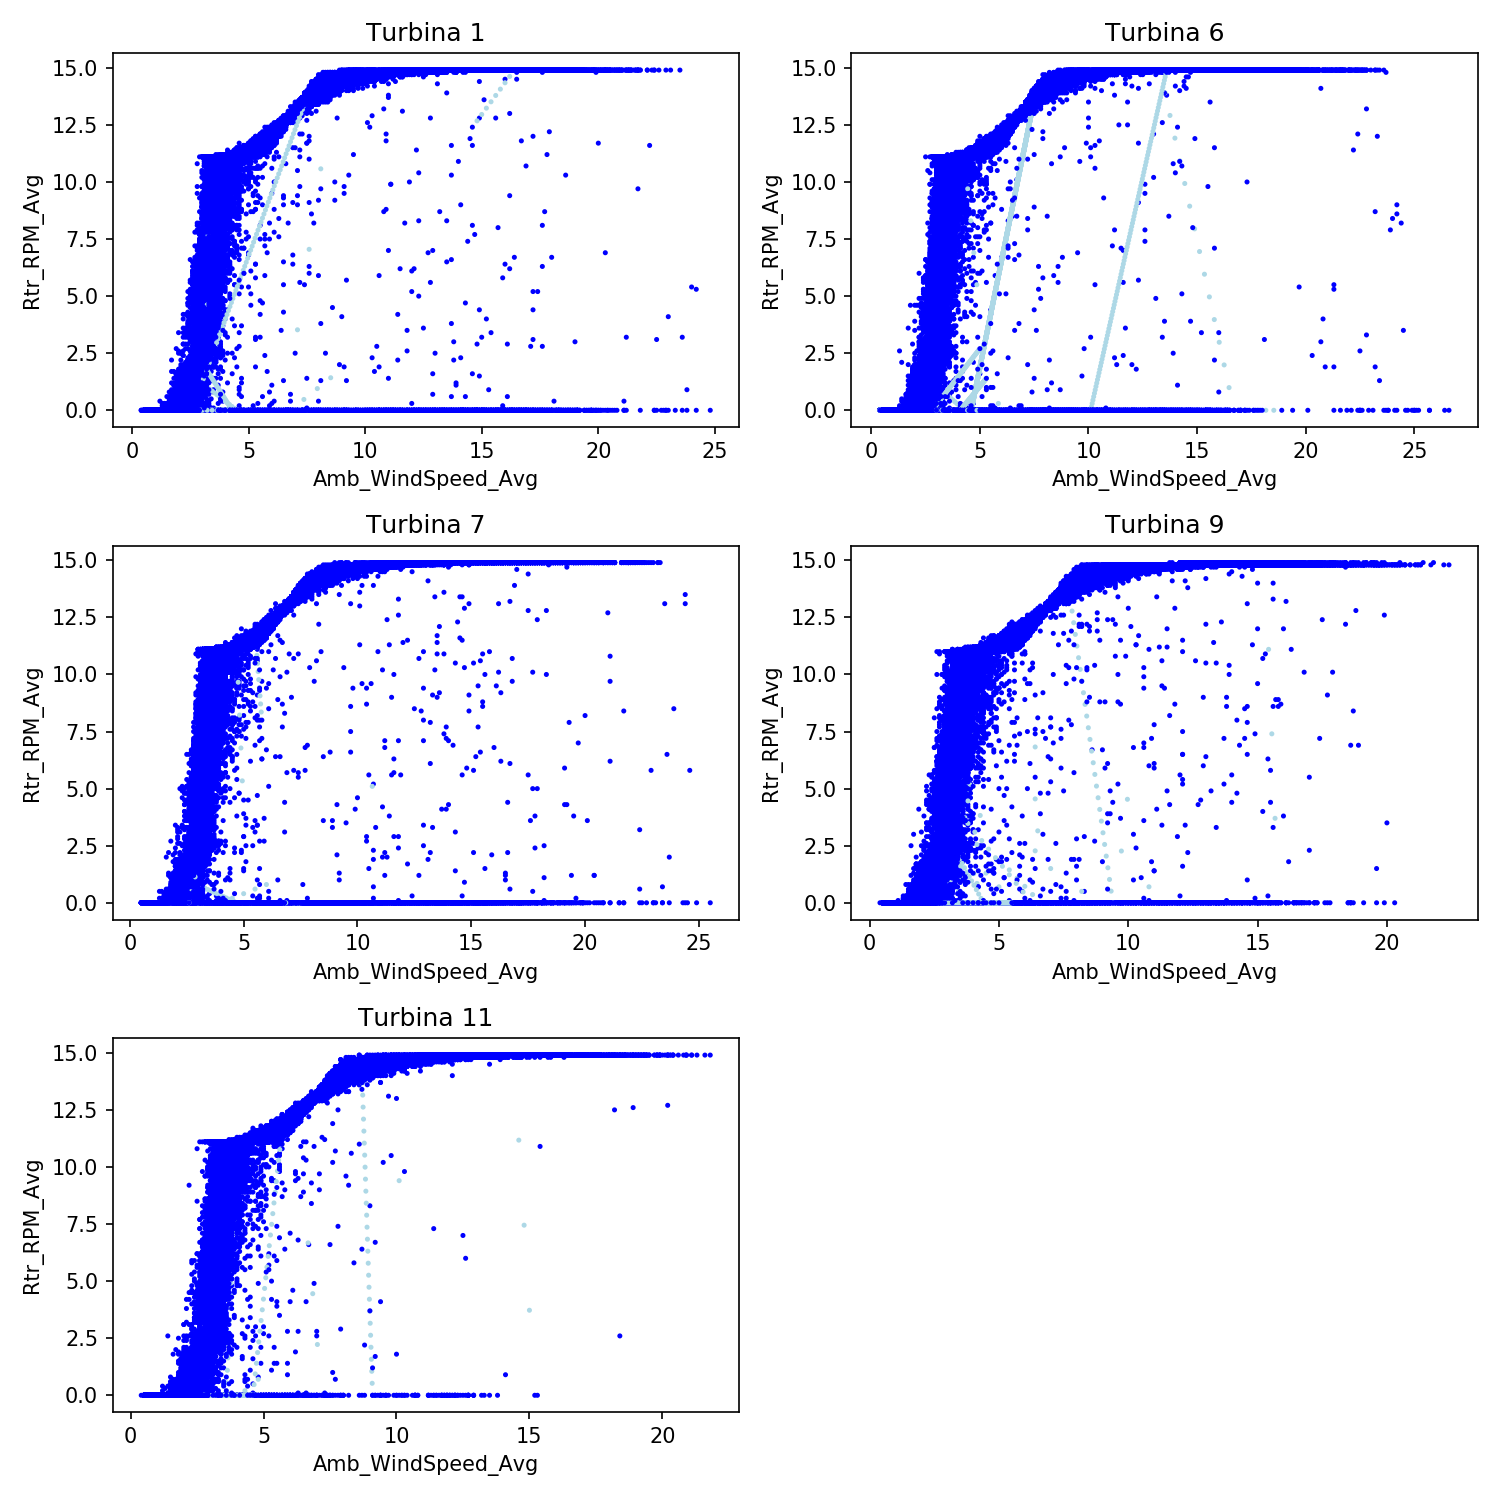

In [20]:
multi_pair_plot("Amb_WindSpeed_Avg", "Rtr_RPM_Avg")

## Generowany prąd / Obroty śmigła

<IPython.core.display.Javascript object>


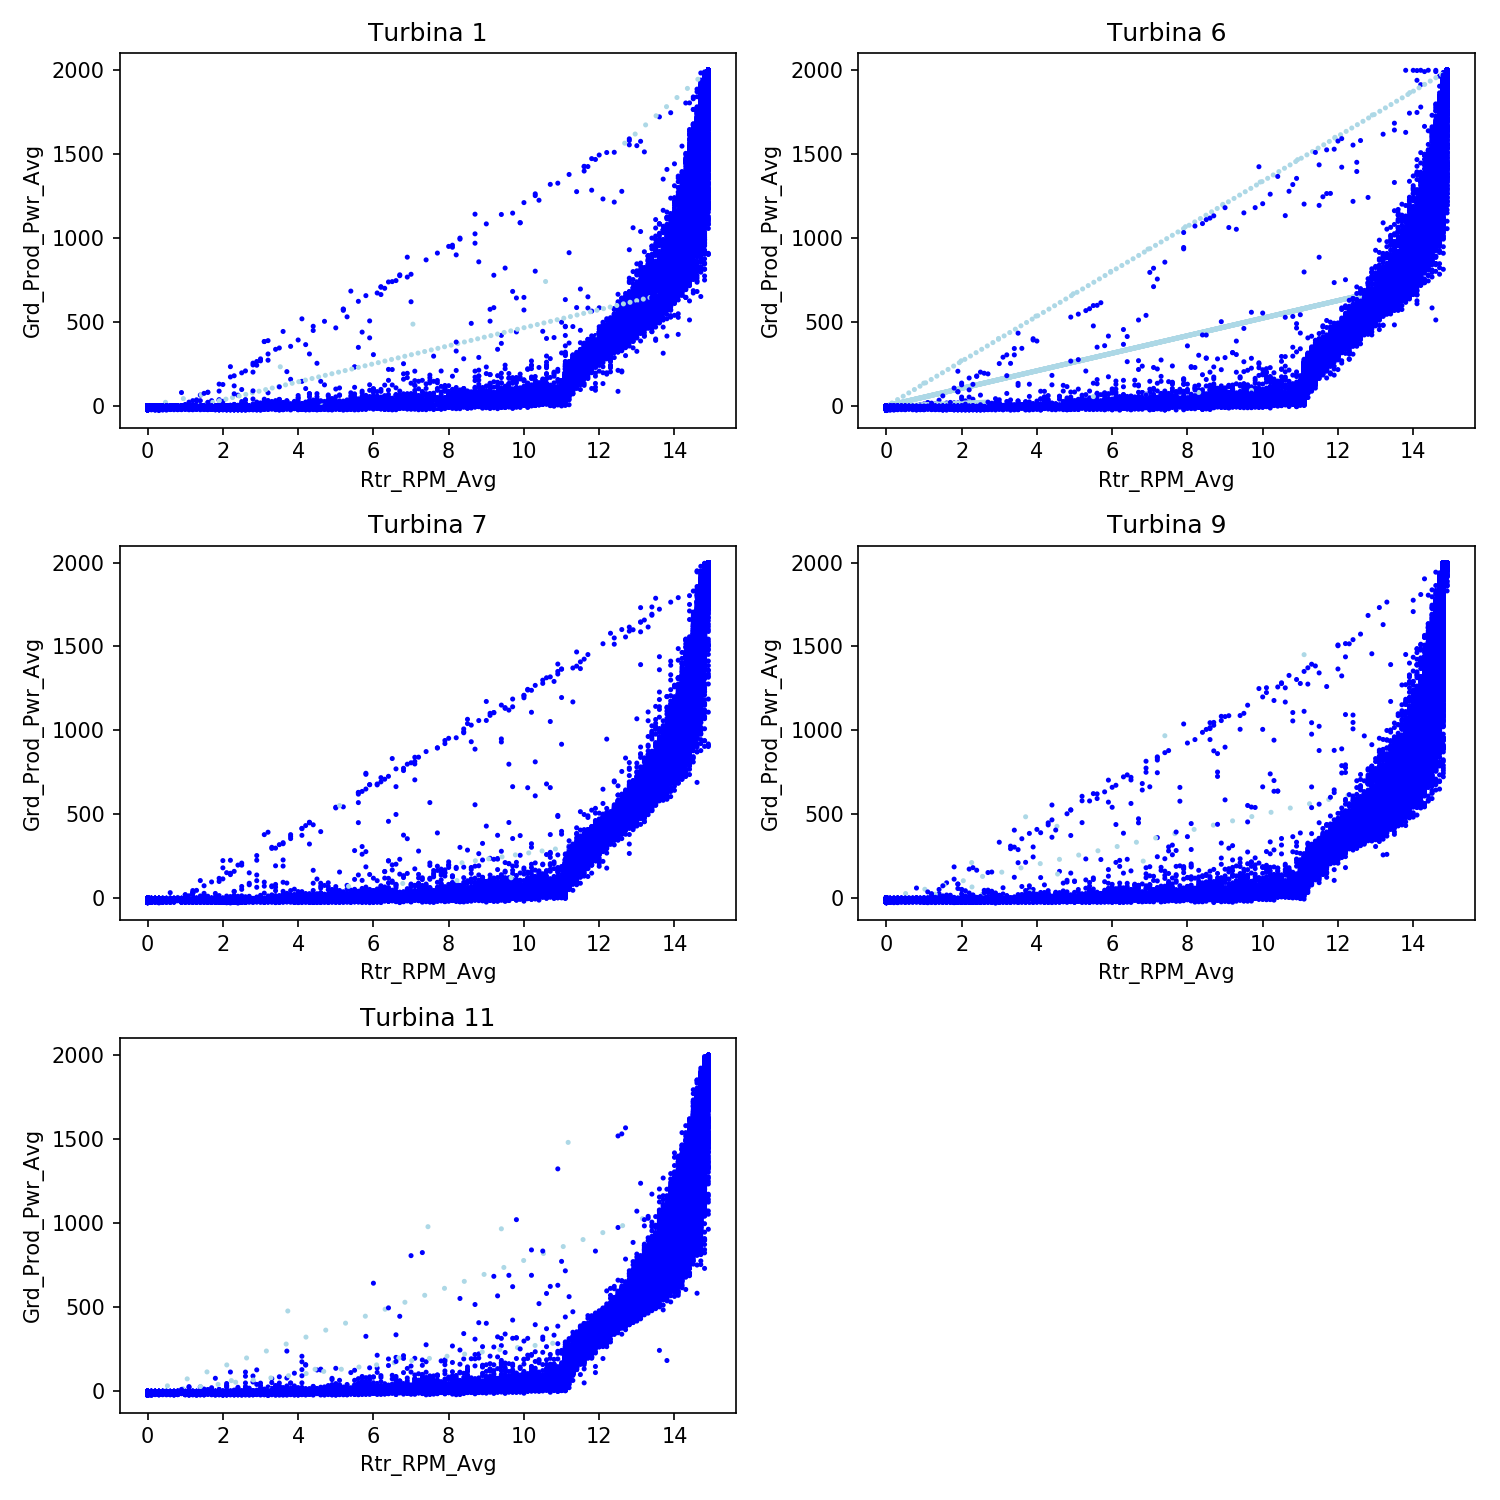

In [21]:
multi_pair_plot("Rtr_RPM_Avg", "Grd_Prod_Pwr_Avg")

## Temperatura łożyska / Obroty śmigła

<IPython.core.display.Javascript object>


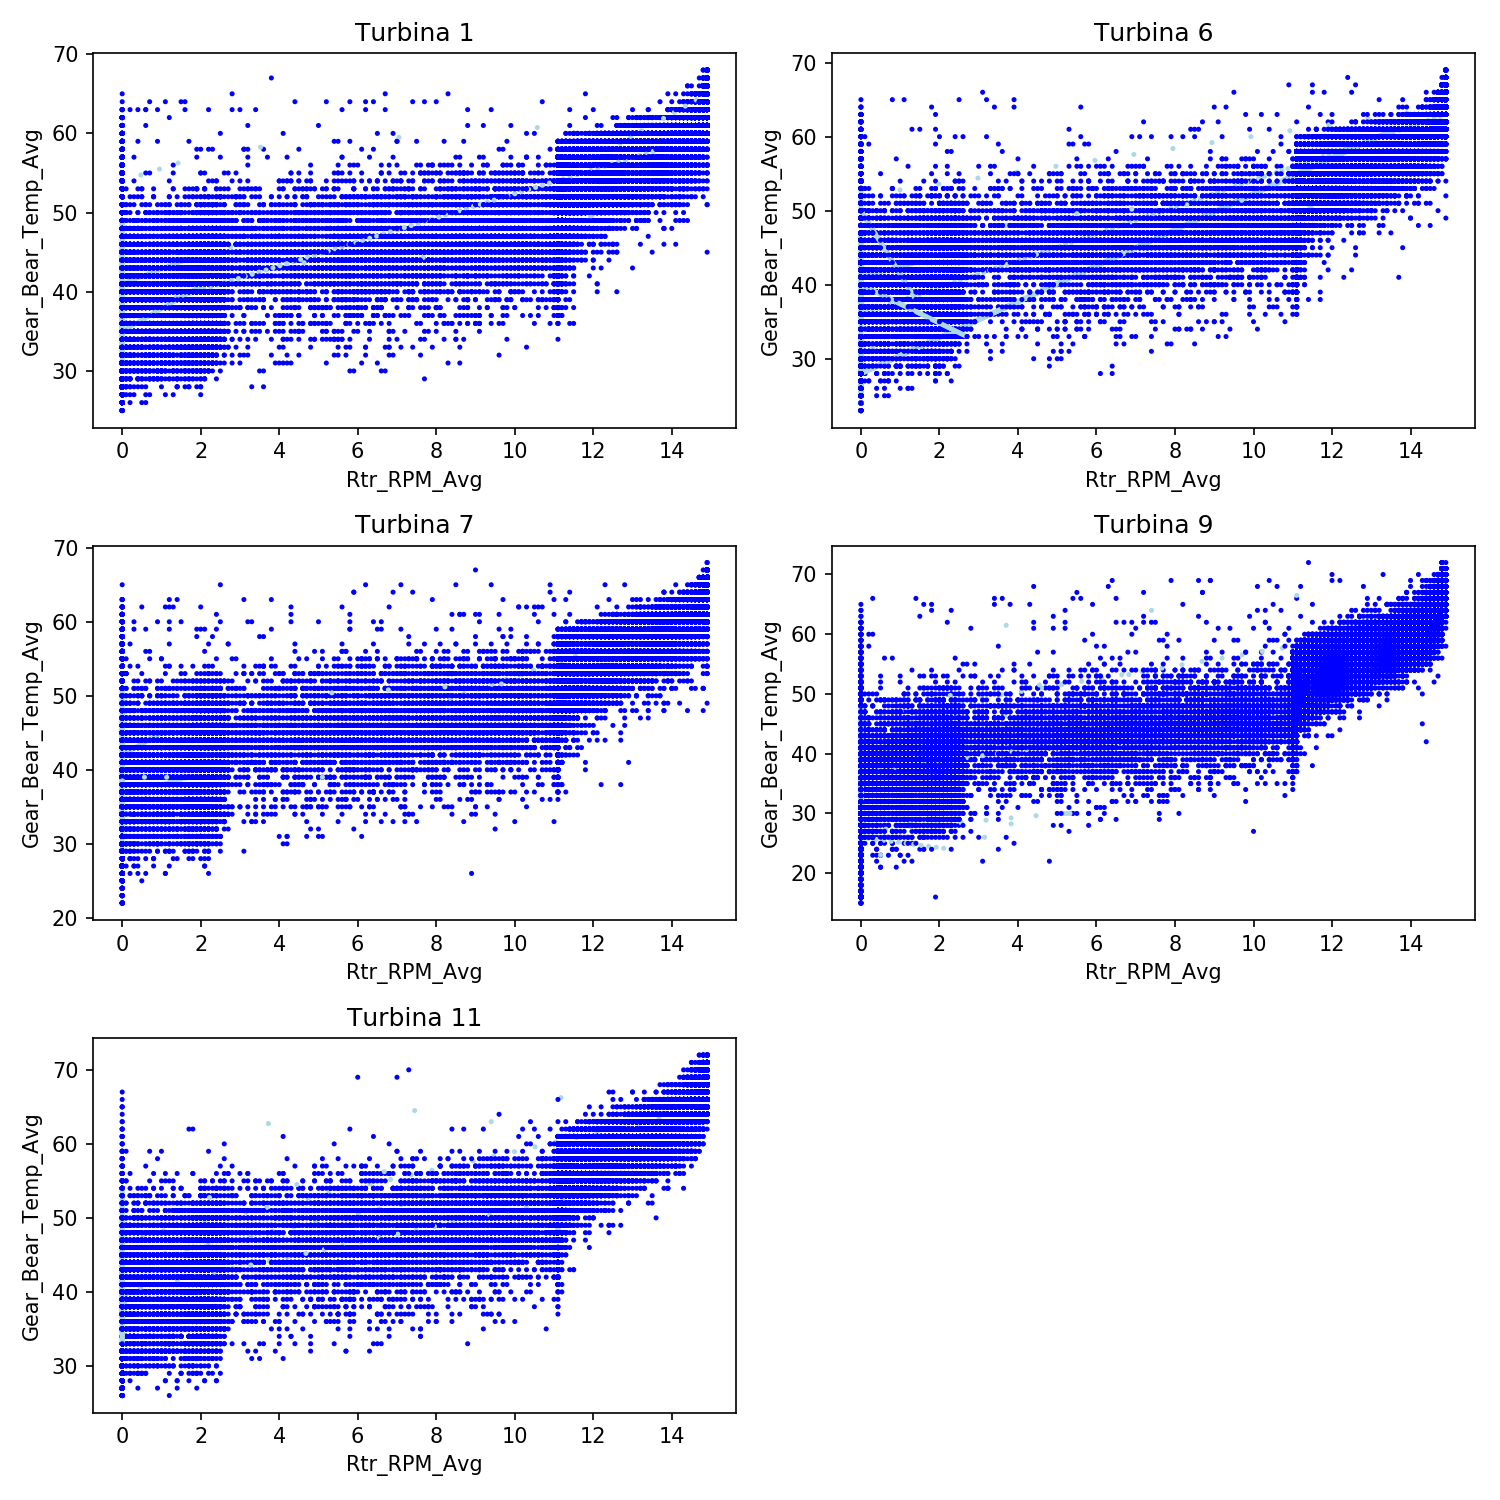

In [22]:
multi_pair_plot("Rtr_RPM_Avg","Gear_Bear_Temp_Avg")

## Obroty generatora / Obroty śmigła

<IPython.core.display.Javascript object>


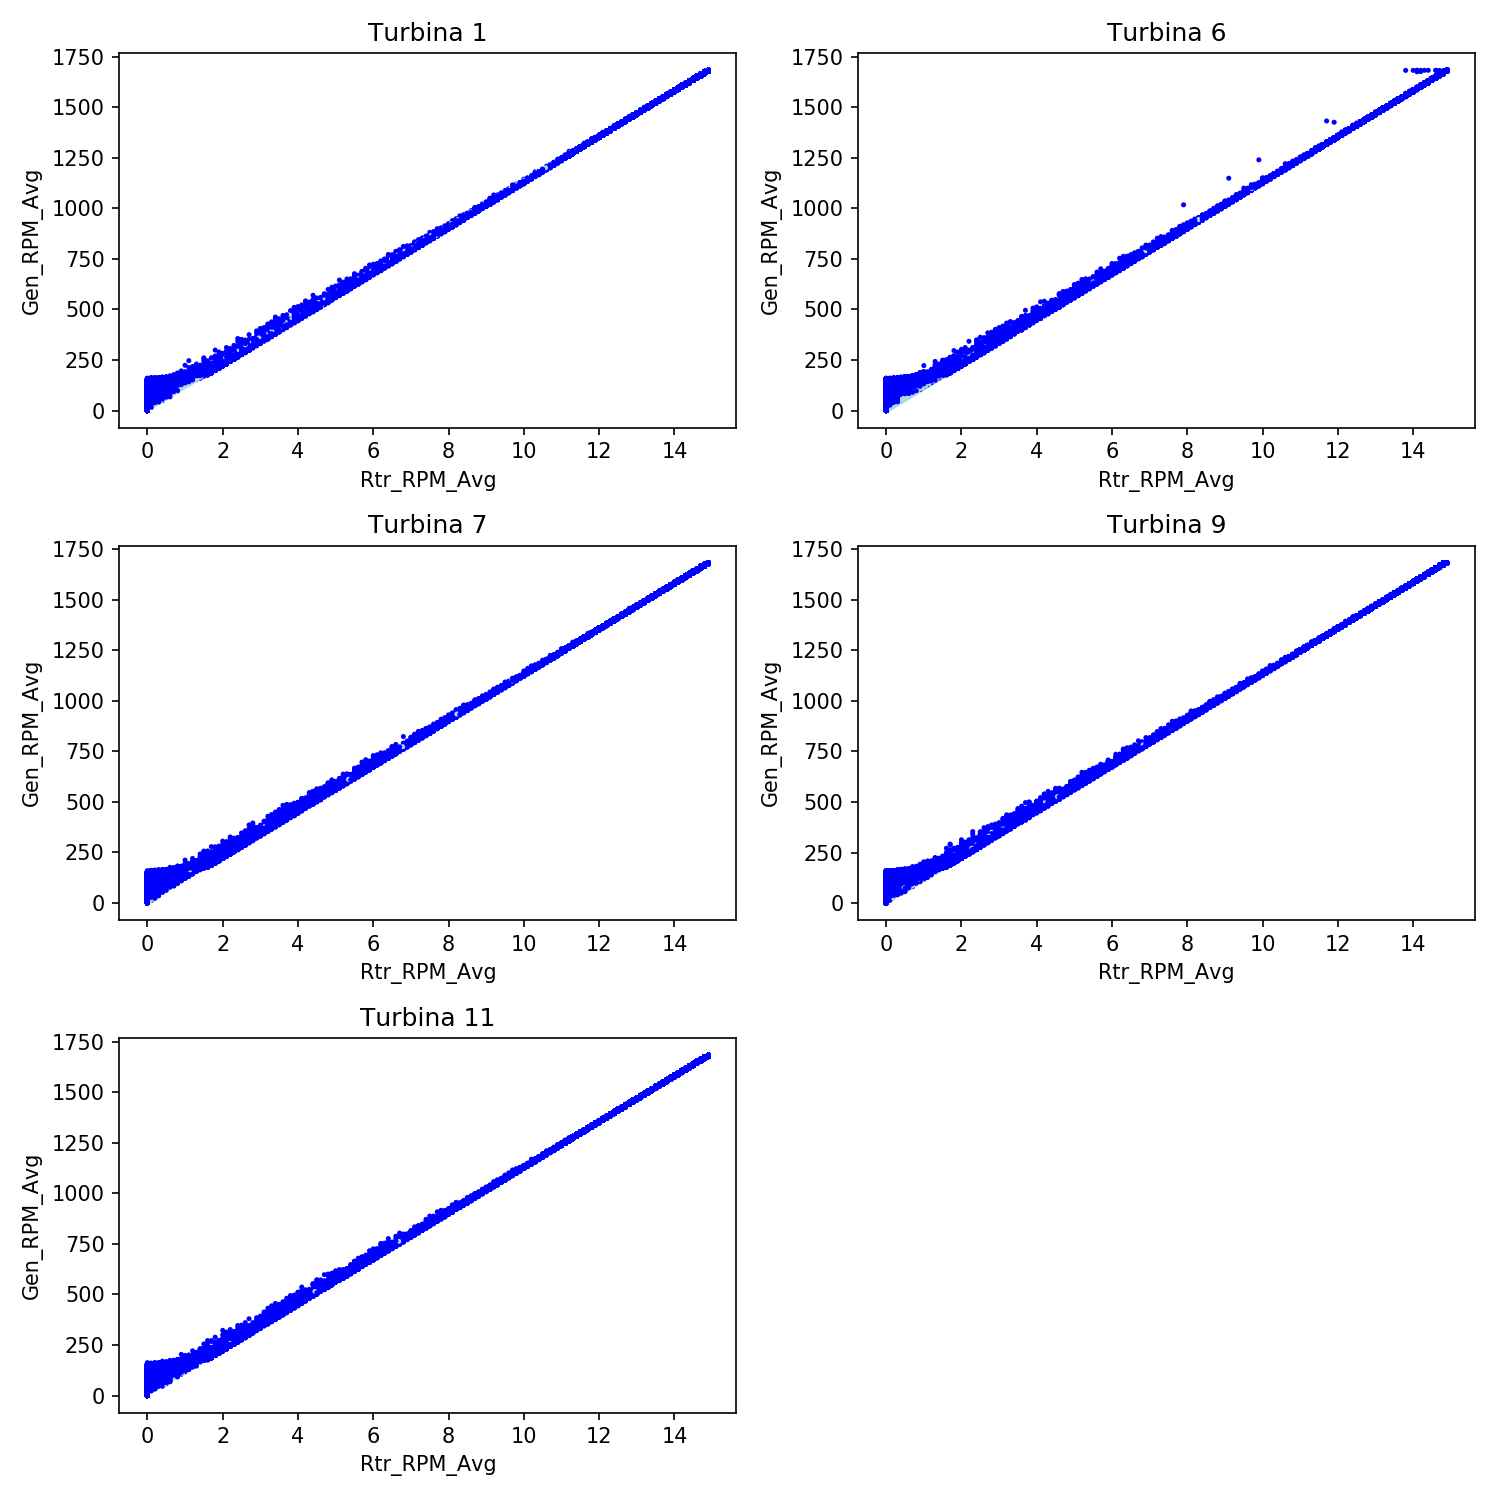

In [23]:
multi_pair_plot("Rtr_RPM_Avg", "Gen_RPM_Avg")

## Temperatura łożyska / Produkowany prąd

<IPython.core.display.Javascript object>


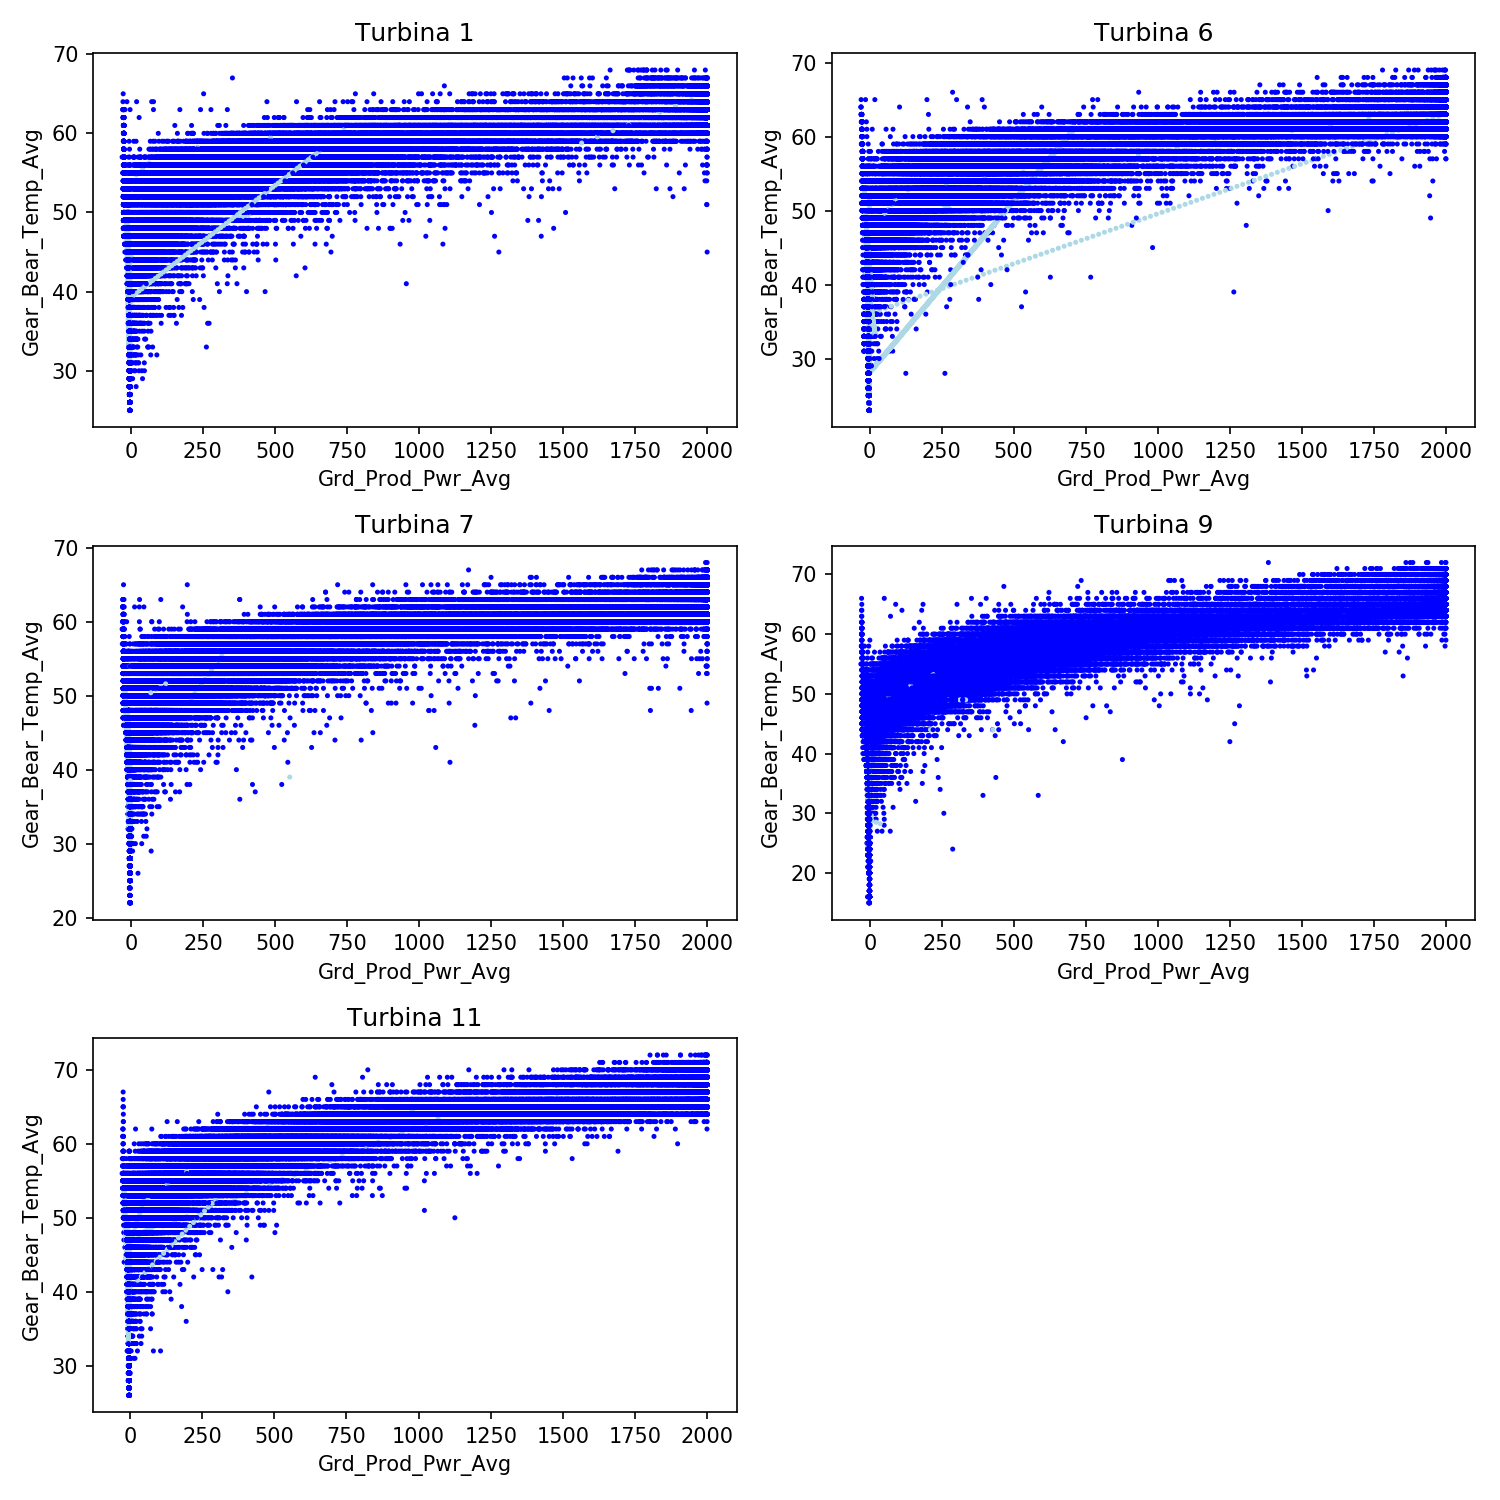

In [24]:
multi_pair_plot("Grd_Prod_Pwr_Avg", "Gear_Bear_Temp_Avg")